#### _Speech Processing Labs 2020_ 

In [1]:
## Run this first!
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import cmath
from math import floor
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
plt.style.use('ggplot')

from dspMisc import * 

# M2 Speech Production: Source and Filter

# 1 Building the Source

### Learning Outcomes
* Be able to describe what an impulse train is
* Be able to explain why an impulse train is used to model the voice source
* Be able to describe the frequency response of single impulse and and impulse train


### Need to Know
* Topic Videos: Harmonics, Impulse Train, Frequency Domain
* Interpreting the Discrete Fourier Transform





## 1.1 A Single Impulse Response

The previous notebooks looked at the [Discrete Fourier Transform](sp-m1-4-discrete-fourier-transform.ipynb) does and how to [interpret the DFT's outputs](sp-m1-5-interpreting-the-dft.ipynb). Now we've got a grip on that, 
we can start thinking about how this ability to go from the time domain to the frequency domain (and back again) can help us build up a model of speech. 

Let's start simple: What happens when the input is just a single **impulse**? What can this tell us? 

The following code cells generate a single impulse in an input sequence of length `N=64`, given a specific sampling rate `f_s`.  As we saw previously, the DFT frequency resolution is completely determined by these two parameters. 


In [2]:
## Set the number of samples N, sampling rate f_s
## As usual all our interpretation of the DFT outputs will depend on the values of these parameters

N=64

#sampling rate: 
f_s = 64

## sample time
t_s = 1/f_s

## Check our parameters
print("Number of samples: N = %d" % N)
print("sampling rate: f_s = %f\nsampling time: t_s: %f" % (f_s, t_s))



Number of samples: N = 64
sampling rate: f_s = 64.000000
sampling time: t_s: 0.015625


Text(0.5, 1.0, 'A single impulse as input')

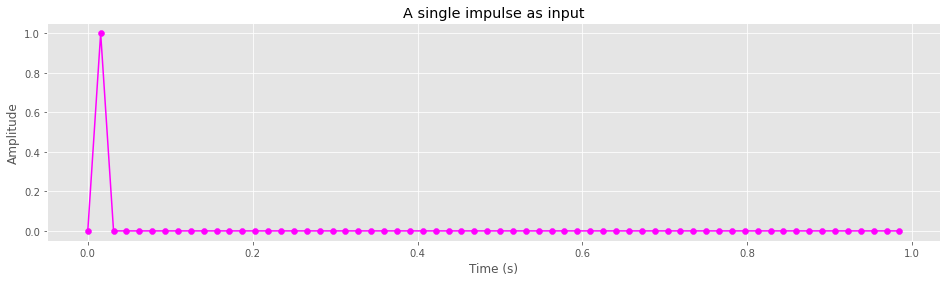

In [5]:
## indices of input sequence of size N
nsteps = np.array(range(N))

## the sequence of time steps given the sampling rate 
time_steps = t_s * nsteps

## Now let's create an impulse response
#  First, we create a sequence of length N but all zeros
x_impulse = np.zeros(N)

#  And then set a single element to be 1, i.e. a single impulse
x_impulse[1]=1

## Now, we plot it:
fig, timedom = plt.subplots(figsize=(16, 4))
timedom.scatter(time_steps, x_impulse, color='magenta')
timedom.plot(time_steps, x_impulse, color='magenta')

timedom.set_ylabel("Amplitude")
timedom.set_xlabel("Time (s)")
timedom.set_title("A single impulse as input")



The plot above shows an time vs amplitude graph of input $x[n]$, where all but 1 of the $N=64$ input points are zero, and $x[1]=1$. 

Now let's look at the DFT of this single impulse.

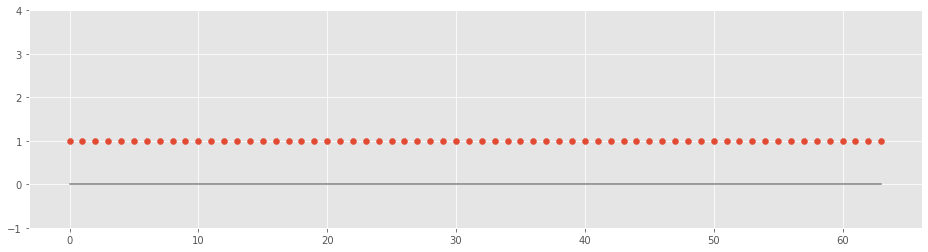

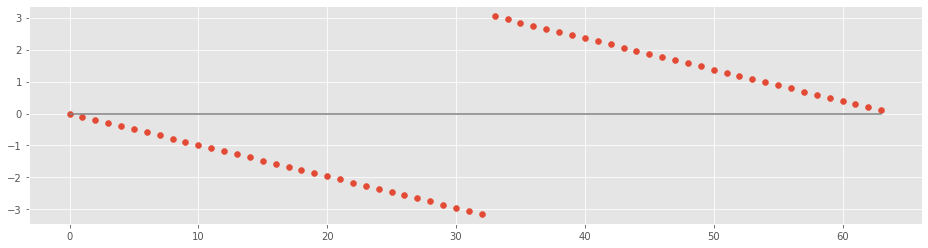

In [6]:
## Now let's look at the DFT outputs of the impulse: 
mag_impulse, phase_impulse = get_dft_mag_phase(x_impulse, N)

## Note: in this case N=f_s so the DFT output frequencies are the same as the DFT output indices
## We'll look at cases where this differs later
dft_freqs = get_dft_freqs_all(f_s, N)

## plot the magnitudes, but this time we're going to need to zoom in a bit on the y-axis: 
fig, timedom = plt.subplots(figsize=(16, 4))
timedom.set(ylim=(-1, 4))
timedom.plot([0,np.max(dft_freqs)], [0,0], color='grey')
timedom.scatter(dft_freqs, mag_impulse)

## Plot the phases
fig, timedom = plt.subplots(figsize=(16, 4))
timedom.plot([0,np.max(dft_freqs)], [0,0], color='grey')
timedom.scatter(dft_freqs, phase_impulse)

## You should see that magnitudes for all the bins is one (you might need to change the y axis limit)

### Exercise: 
**Question**

* What does the magnitude spectrum show? 
* What does the phase spectrum show? 
* How might this be useful for modelling the vocal source? 


### Notes

## 1.2 From Impulse to Impulse Train

The DFT analysis above showed us that a single impulse can potentially be linked to any frequency! 
This might not seem very useful at first, but actually we can use this to start making a model of the voice source that we can shape in the way we want. The first thing is to add a **periodic** element.  To do this we'll make an **impulse train**: a sequence `x` with value 1 every `n_period` samples, and zero otherwise. 

We should note though that not all speech sounds are periodic.  For example, fricatives like /s/ and /sh/ are more like white noise. We'll have to model these in other ways.  

Now let's make an impulse train with `N=64` samples, a sampling rate of `f_s=64` samples per second, and an impulse period `n_period=4`:

Text(0.5, 1.0, 'An impulse train: an impulse every 4 samples')

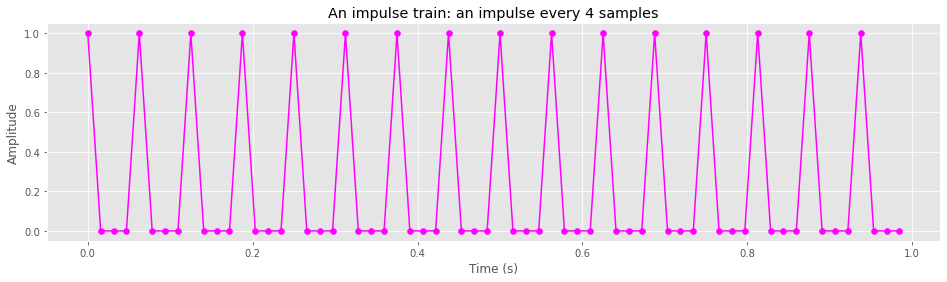

In [11]:
## Let's keep the number of samples and the sampling rate the same as above
N=64
f_s = 64
t_s = 1/f_s
nsteps = np.array(range(N))
time_steps = t_s * nsteps

## Now let's create an impulse response:

# create a sequence of length N but all zeros
x_impulse_train = np.zeros(N)

# set the impulse period to be 1 impulse every n_period samples
n_period = 4

# Find the indices which will carry the impulses, i.e. every n_period-th one starting from 0 to N
impulse_indices = np.arange(0, N, n_period)

## Set the impulses
x_impulse_train[impulse_indices] = 1

## Plot it!
fig, timedom = plt.subplots(figsize=(16, 4))
timedom.scatter(time_steps, x_impulse_train, color='magenta')
timedom.plot(time_steps, x_impulse_train, color='magenta')
timedom.set_ylabel("Amplitude")
timedom.set_xlabel("Time (s)")
timedom.set_title("An impulse train: an impulse every %d samples" % n_period)

You should see a repeated sequence over 1 second where every 4th sample has amplitude 1, and all the rest have value 0.  

### DFT of an impulse train

Now let's look at the DFT of this impulse train.

Text(0.5, 1.0, 'Impulse Train Phase Response (First N/2 DFT outputs)')

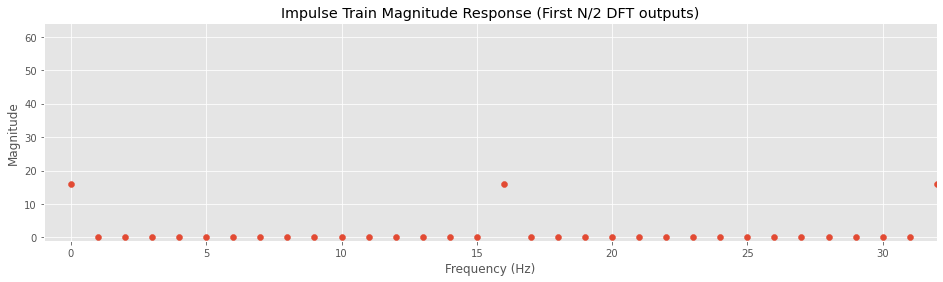

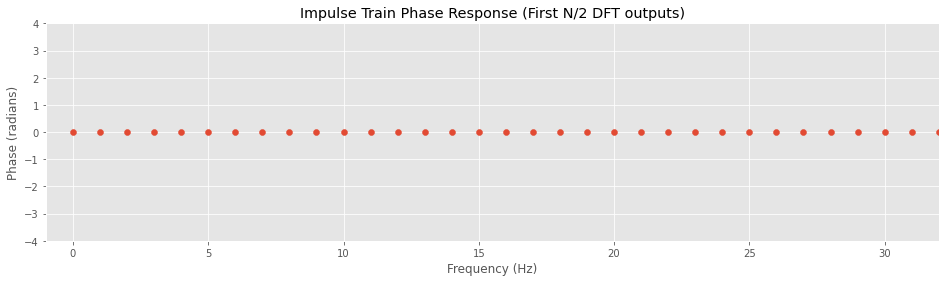

In [12]:
##  Get the DFT outputs: magnitude and phase
mag_impulse_train, phase_impulse_train = get_dft_mag_phase(x_impulse_train, N)

## Get the DFT output frequencies, for plotting
dft_freqs = get_dft_freqs_all(f_s, N)

## plot the magnitudes, but this time we're going to need to zoom in a bit on the y-axis: 
fig, fdom = plt.subplots(figsize=(16, 4))
fdom.set(ylim=(-1, N), xlim=(-1, N/2))
fdom.scatter(dft_freqs, mag_impulse_train)
fdom.set_xlabel("Frequency (Hz)")
fdom.set_ylabel("Magnitude")
fdom.set_title("Impulse Train Magnitude Response (First N/2 DFT outputs)")

## Plot the phases
fig, fdom = plt.subplots(figsize=(16, 4))
fdom.set(ylim=(-4,4), xlim=(-1, N/2))
fdom.scatter(dft_freqs, phase_impulse_train)
fdom.set_xlabel("Frequency (Hz)")
fdom.set_ylabel("Phase (radians)")
fdom.set_title("Impulse Train Phase Response (First N/2 DFT outputs)")


The magnitude (top) plot indicates that the impulse train has frequency components at multiples of  8 Hz. z
The phase plot (bottom) doesn't show a phase shift.  This makes also makes sense since our input sequence started with a 1, so acts like cosine with no phase shift. 

**Note** We only plotted the first $N/2$ DFT outputs since we saw previously that DFT outputs are symmetrical around $N/2$. 


### Exercise 

* What the relationship between the non-zero magnitudes in the example above? 
    * What's the fundamental frequency of the impulse train? 
* What DFT output frequencies have non-zero magnitudes if you you change `n_period` to `8`?  
* What happens when the frequency doesn't exactly match one of the DFT outputs? 
    * e.g. try `n_period = 5`

### Notes

## 1.3 Impulse train fundamental frequency

Since we eventually want to model the vocal source, we want to be able to create impulse trains with specific fundamental frequencies ($F_0$). As usual for digital signal processing, the actual sequence we generate to represent this will depend on the sample rate. 

The following cell defines a function to create impulse trains varying the sample rate, desired frequency, and number of samples. We'll use this later to see how this interacts with different types of filters. 


In [8]:
def make_impulse_train(sample_rate, frequency, n_samples):    
    # make an arrange of n_samples, all zeros to start
    x = np.zeros(n_samples)
    
    # Determine where the impulses go based on the sample rate
    # The time between samples: sample_time = 1/sample_rate
    
    #A frequency of f cycles/second means the wavelength=1/f
    # So samples_per_cycle = wavelength/t_s = 1/frequency / 1/sample_rate = sample_rate/frequency
    
    ## We need to round to the nearest integer
    samples_per_cycle = round(sample_rate/frequency)
    
    # Set indices for impulses
    impulse_positions = np.arange(0, n_samples, samples_per_cycle)
    #print("impulse_positions:", impulse_positions)
    # set the impulses
    x[impulse_positions] = 1
    
    ## return the time steps associated with the impulse train samples
    nsteps = np.array(range(n_samples))
    time_steps = (1/sample_rate) * nsteps   
    
    return x, time_steps

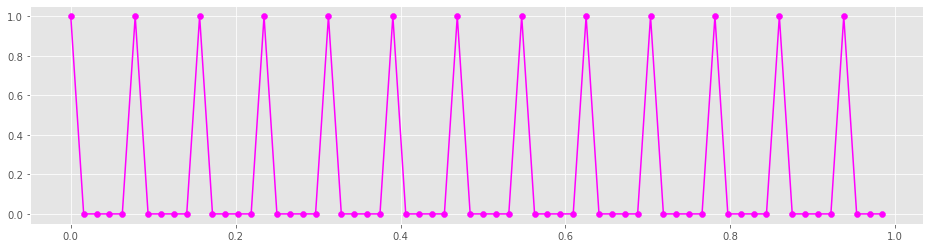

In [13]:
## Set the number of samples and sampling rate
N = 64
f_s = 64

## set our desired impulse train frequency
freq = 12

x_impulse_train, time_steps = make_impulse_train(sample_rate=f_s, frequency=freq, n_samples=N)

fig, timedom = plt.subplots(figsize=(16, 4))
timedom.scatter(time_steps, x_impulse_train, color='magenta')
timedom.plot(time_steps, x_impulse_train, color='magenta')



### Exercise

Try changing the frequency of the impulse train. 
* What's the highest frequency you can actually generate if the sample rate equals 64? 


### Notes

### Next: Filters

Now that we've made a (sort of) source, we want to create a filter that can alter input (impulse train) so that the output looks the way we want it it.  In class you've seen two types of filters: 

* Finite Impulse Response (FIR)
* Infinite Impulse Response (IIR)

Both perform a transform on an input sequence $x[n]$ to give us some desired output sequence $y[n]$.  The difference between the two types of filters is basically whether we only use the inputs to derive each output $y[n]$ (FIR), or whether we also use previous outputs (IIR). 

The following notebooks illustrate some of the properties of FIR and IIR filters. 